In [1]:
import random
import numpy as np

In [60]:
class GridMaker:
    def Grid (width, height, minlength=3):
        
        if width % 2:
            halfwidth = int(width/2) + 1
        else:
            halfwidth = int(width/2)
        
        #initiate all-white grid
        grid = np.full([halfwidth, height], True, dtype=bool)
        

        #add random black squares
        #grid = GridMaker.randomBlackFields(grid)
            
        #alternative: start with a basic shape
        grid = GridMaker.basicShape(grid)
        
        #choose symmetry
        sym = random.choice(['point', 'mirror'])
        print(sym)
            
        
         #if width is uneven and we use point symmetry, the middle column needs to be vertically mirrored
        if sym == 'point' and width % 2:
                for i in range(height):
                    grid[int(width/2), i] = grid[-1, -i] and np.flip(grid)[-1, i]
        
        #add other half
        if width % 2:
            otherhalf = grid[:-1,:]
        else:
            otherhalf = grid[:,:]
            
        if sym == 'point':
            otherhalf = np.flip(otherhalf)
        else:
            otherhalf = np.flipud(otherhalf)
        
        grid = np.concatenate([grid, otherhalf], 0)
        
        
        #check grid
        valid = False
        while not valid:
            valid = True
            
            #check for large white rectangles (to do)
            
            #check for large black rectangles (to do)
            
            #add a random black field if the grid is becomming too white
            if np.sum(grid) / (width*height) > 0.75:
                randx = random.randrange(width)
                randy = random.randrange(height)
                grid[randx,randy] = False
                if sym == 'point':
                    grid[-(1+randx), -(1+randy)] = False
                else:
                    grid[-(1+randx), randy] = False
                valid = False
            
            
            #check columns
            if valid:
                for x in set(range(width)):
                    col = grid[x,:]
                    if np.sum(col) > 0:

                        #check if column needs to be symmetrical
                        symmetrical = sym == 'point' and width % 2 and x == 1 + int(width/2)

                        newcol = GridMaker.CheckMinLength(col, minlength, symmetrical)

                        if np.sum(newcol) != None:
                            valid = False
                            grid[x,:] = newcol
                            if sym == 'point':
                                grid[-(x+1),:] = np.flip(newcol)
                            else:
                                grid[-(x+1),:] = newcol

                            break
                    else:
                        grid[x,random.randrange(height)] = True
                
            #check rows
            if valid:
                for y in set(range(height)):
                    if y == 17:
                        print(y)

                    row = grid[:,y]
                    
                    if np.sum(row) > 0:  
                        #check if row needs to be symmetrical
                        symmetrical = False
                        if sym == 'mirror':
                            symmetrical = True
                        elif height % 2 and y == 1 + int(height/2):
                            symmetrical = True

                        newrow = GridMaker.CheckMinLength(row, minlength, symmetrical)

                        if np.sum(newrow)  != None:
                            valid = False
                            grid[:,y] = newrow
                            if sym == 'point':
                                grid[:,-(y+1)] = np.flip(newrow)

                            break
                    
                    else:
                        grid[random.randrange(width), y] = True
                        
            #check if the white fields are all connected (no "islands")
                        
            #valid = True  #interrupts loop. Only use for testing
        
        return(grid.T)
    
    def randomBlackFields(grid, density=0.5):
        """Randomly pick fields in the grid and make them black fields."""
        
        totalfields = grid.shape[0] * grid.shape[1]
        
        for i in range(int(totalfields*density)):
            x = random.randrange(grid.shape[0])
            y = random.randrange(grid.shape[1])
            
            grid[x,y] = False
            
        return grid
    
    def basicShape (grid):
        """Start with a basic geometric shape like a cross or diamond. Keep in mind that this 
        is applied to only the left half of a grid."""
        
        shapes = ['X', 'diamond']
        shape = random.choice(shapes)
        print(shape)
        
        if shape == 'X':
            cors = [(x, x) for x in range(grid.shape[0])] + [(x, grid.shape[1]-(x+1)) for x in range(grid.shape[0])]
        else:
            cors = [(grid.shape[0]-(x+1), x) for x in range(grid.shape[0])] + [(grid.shape[0]-(x+1), grid.shape[1]-(x+1)) for x in range(grid.shape[0])]
        
        for (x,y) in cors:
            grid[x,y] = False
            
        return grid

    
    def CheckMinLength (row, minlength, symmetrical):
        """Check whether a row (or column) has no sequences shorter than the minimum length."""
        
        getstartingpoints = lambda r: [i for i in range(len(r)) if r[i] and (i == 0 or (i > 0 and not r[i-1]))]
        
        startingpoints = getstartingpoints(row)
        
        #count the length for each starting point of a sequence
        for i in startingpoints:
            seq = row[i:]
            length = 0
            for field in seq:
                if field:
                    length += 1
                else:
                    break
                    
            if length < minlength:
                #if the sequence is too short
                if i == 0:
                    #if this was the starting sequence, add a field at the end
                    row[length] = True
                    #if symmetry needs to be maintained, mirror the operation
                    if symmetrical:
                        row[-(length+1)] = True
                elif i + length == len(row):
                    #if it was the ending sequence, add a field at the start
                    row[i-1] = True
                    #and mirror the operation if required
                    if symmetrical:
                        row[len(row)-i] = True
                else:
                    #for sequences in the middle
                    #try adding a field at the front and back of the sequence...
                    addedfront = row[:]
                    addedfront[i-1] = True
                    if symmetrical:
                        addedfront[-i] = True
                        
                    addedback = row[:]                
                    addedback[i+length] = True
                    if symmetrical:
                        addedback[-(i+length+1)] = True
                    #... and pick the version that does less merging of sequences (i.e. retains more starting points)
                    row = max((addedfront, addedback), key = lambda r: len(getstartingpoints(r)))
                    
                #return the fixed version
                return row
        
        return None
        

In [3]:
example = [ True, True, True, False, False, False, False, True, True, True, False, True, True] 
print(sum(example))
#print(example)
print (example)
print(GridMaker.CheckMinLength(example, 3, False))

8
[True, True, True, False, False, False, False, True, True, True, False, True, True]
[True, True, True, False, False, False, False, True, True, True, True, True, True]


In [61]:
g = GridMaker.Grid(18,18)
print(g)
print(g.shape[0])

diamond
mirror
17
17
[[ True  True  True  True False False  True  True  True  True  True  True
  False False  True  True  True  True]
 [ True  True  True  True False False  True  True  True  True  True  True
  False False  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True]
 [ True  True  True  True  True  True  True False False False False  True
   True  True  True  True  True  True]
 [ True  True  True False  True  True  True False False False False  True
   True  True False  True  True  True]
 [ True  True  True False  True  True  True False False False False  True
   True  True False  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True]
 [ True  True  True  True False False  True  True  True  True  True  True
  False False  True  True  True  True]
 [ True  True  True  True  True False False  True  True  True  True False
 

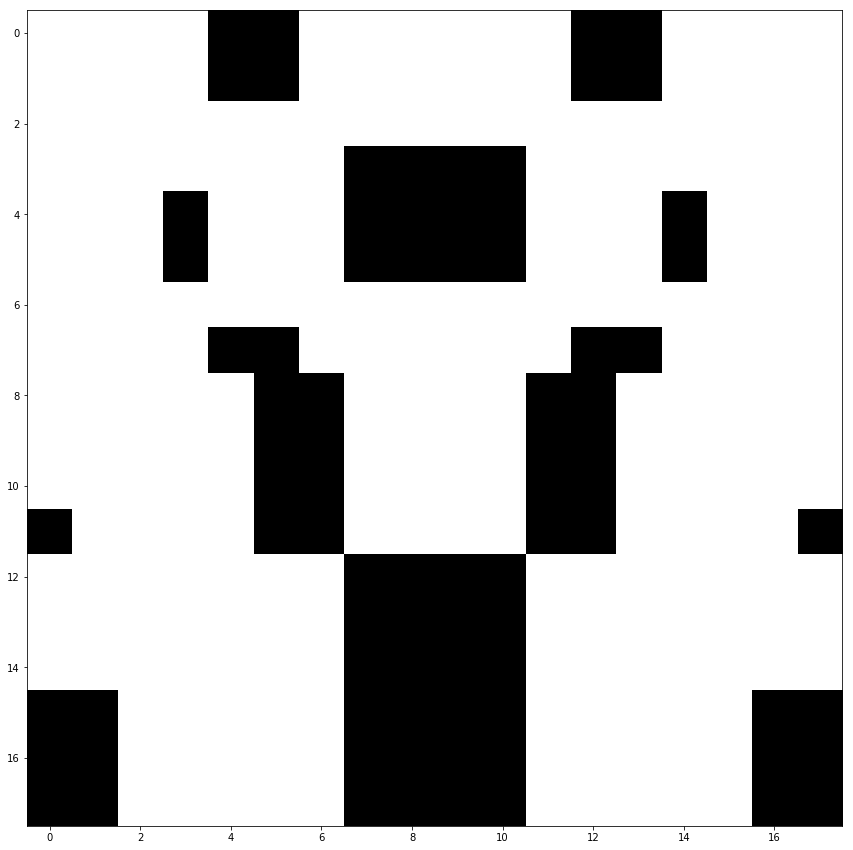

In [62]:
import matplotlib.pyplot as plt

newgrid = np.full(g.shape, 0)
for x in range(g.shape[1]):
    for y in range(g.shape[0]):
        if g[y,x]:
            newgrid[y,x] = 1

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(newgrid, cmap="Greys_r")

plt.show()